# Catatumbo network

This notebook builds a drivable street network for the Catatumbo region with OSMnx (`build_graph`), then runs `simplify_graph` to produce a smaller, easier-to-analyze network while preserving the main connectivity structure. It ends by plotting **original vs. simplified** graphs side by side.

### Simplification idea (`simplify_graph`)

The goal is to compress dense areas of the network into fewer representative nodes without losing regional-scale connectivity:

- Using density clustering, identify dense groups of nearby nodes (clusters) and collapse each cluster into a single representative “center” node.
- Preserve connectivity by reconnecting that center node to the rest of the network using shortest-path routes, stored as aggregated edges (so distance/geometry are retained in simplified form).

### Cleaning the result

After collapsing clusters, the graph is still a MultiDiGraph, meaning it can contain **self-loops** and **multiple parallel edges** between the same pair of nodes. Many downstream NetworkX metrics and workflows are simpler (or only defined) for a standard **DiGraph**, so the notebook “cleans” the graph to make it compatible:

- **Remove self-loops**: edges that go from a node back to itself. These generally have no meaningful interpretation in a street network and can distort graph metrics.
- **Resolve multi-edges (parallel edges)**: if there are several edges between the same two nodes, the approach avoids keeping parallel edges by **inserting an intermediate node** for the extra edges. This converts “multiple edges between two nodes” into distinct two-step connections, preserving the geometry/length information while ensuring the final structure can be represented as a plain **DiGraph**.

In [1]:
from src.graph_construction import build_graph, simplify_graph 
from src.plot_graph import plot_graph

<Axes: >

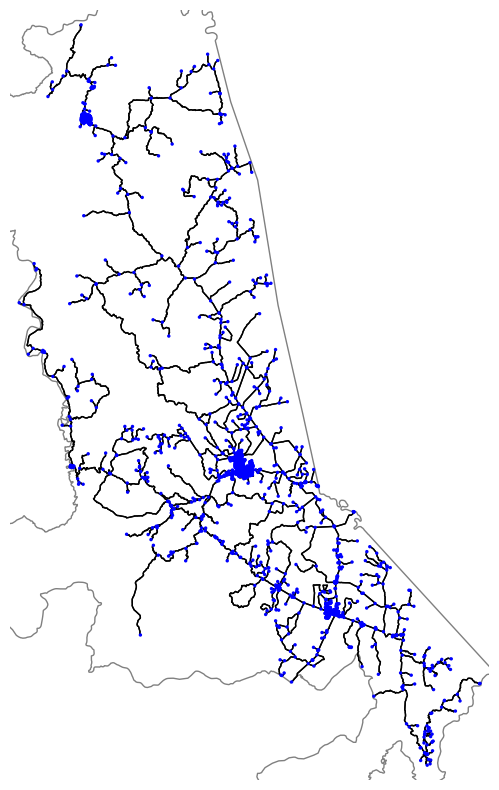

In [2]:
cities = ['Tibú, Colombia']
gdf, G = build_graph(cities)
plot_graph(gdf, G)

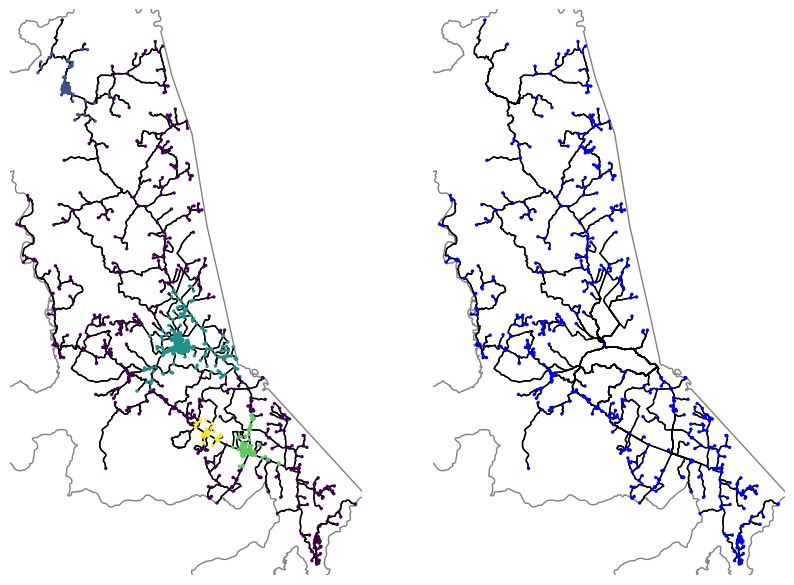

In [3]:
G = simplify_graph(G, gdf, plot = True)